**Esercizio 1**

**(a)**

Come ci si aspetta

In [2]:
import numpy as np

A = np.array([[1,3],[5,7]])
B = np.array([[2,4],[6,8]])
print(A+B)
print(A-B)

[[ 3  7]
 [11 15]]
[[-1 -1]
 [-1 -1]]


**(b)**

In [3]:
print(A@B)
print(B@A)

[[20 28]
 [52 76]]
[[22 34]
 [46 74]]


**(c)**
le matrici sono chiaramente invertibili. Calcoliamo con python la loro inversa

In [4]:
A_inv = np.linalg.inv(A)
B_inv = np.linalg.inv(B)
print(A@B_inv)
print(B@A_inv)

[[ 1.25 -0.25]
 [ 0.25  0.75]]
[[ 0.75  0.25]
 [-0.25  1.25]]


**(d)** (da concludere), in particolare verificare che siano reali gli autovalori

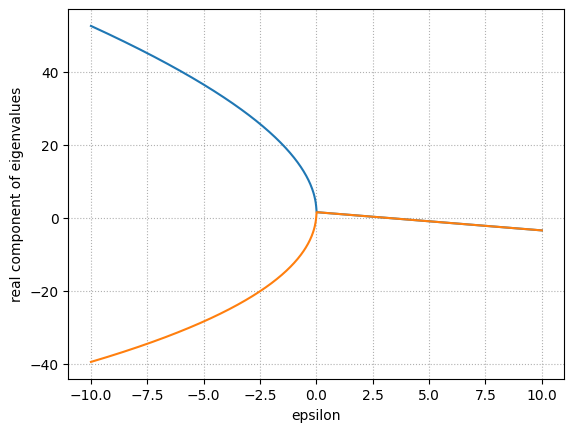

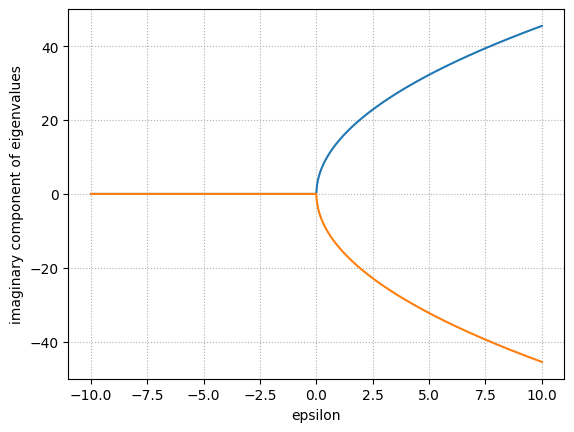

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

# initializing arrays
A = np.array([[101,-90],[110,-98]])
B = np.array([[-1,-1],[0,0]])

#initializing array containing eigenvalues
eps = np.linspace(-10,10,1000)
y_real = np.zeros((len(eps), 2))
y_imag = np.zeros((len(eps), 2))

#filling eigenvalue arrays
for i, epsilon in enumerate(eps):
    y_real[i] = np.linalg.eig(A + epsilon*B)[0].real
    y_imag[i] = np.linalg.eig(A + epsilon*B)[0].imag
    
#creating graph with matplotlib
fig, ax = plt.subplots()

plt.xlabel('epsilon')
plt.ylabel('real component of eigenvalues')

ax.plot(eps,y_real[:,0])
ax.plot(eps,y_real[:,1])
ax.grid(True,ls='dotted')

plt.savefig('autovalori_reali.png', dpi=1000)

fig, ax2 = plt.subplots()

plt.xlabel('epsilon')
plt.ylabel('imaginary component of eigenvalues')

ax2.plot(eps,y_imag[:,0])
ax2.plot(eps,y_imag[:,1])
ax2.grid(True,ls='dotted')

#saving figure
plt.savefig('autovalori_immaginari.png', dpi=1000)

**(e)**

eigenvalues:  [-1.+1.j -1.-1.j]
eigenvectors: 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]


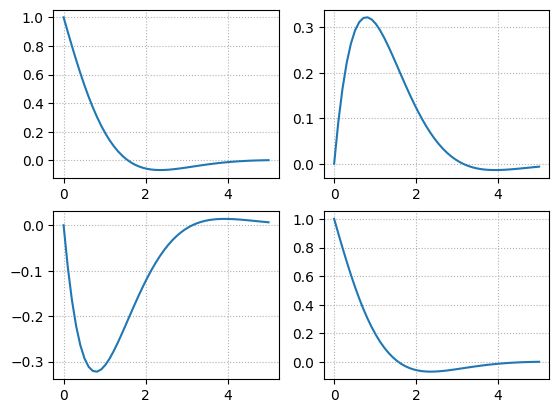

In [19]:
#initializing array
A = np.array([[-1,1],[-1,-1]])

#calculating eigenvalues and vectors
eigenvalues, eigenvectors = np.linalg.eig(A)
print("eigenvalues: ", eigenvalues)
print("eigenvectors: \n",eigenvectors)

#calculating inverse, used to find exponential matrix
egienvec_inv = np.linalg.inv(eigenvectors)

t = np.linspace(0, 5)

y_real = np.zeros((2,2,len(t)))
y_imag = np.zeros((2,2,len(t)))

for i, t_element in enumerate(t):
    exp_diagonal = np.diag(np.exp(t_element*eigenvalues))
    #change of basis - we return to A's basis
    exp_matrix = eigenvectors @ exp_diagonal @ egienvec_inv
    y_real[:,:,i] = exp_matrix.real
    y_imag[:,:,i] = exp_matrix.imag


fig, ax = plt.subplots(2,2)

#plotting real and imaginary in for plots
ax[0,0].plot(t,y_real[0,0])
ax[1,0].plot(t,y_real[1,0])
ax[0,1].plot(t,y_real[0,1])
ax[1,1].plot(t,y_real[1,1])


ax[0,0].grid(True,ls='dotted')
ax[1,0].grid(True,ls='dotted')
ax[0,1].grid(True,ls='dotted')
ax[1,1].grid(True,ls='dotted')


    
plt.savefig('esponenziale.png', dpi=1000)

**(f)**
not sure: > 1 means abs value is > 1, and final section about rescaling gaussian

In [7]:
n = 5
sample_num = 100000
real_axis_counter = 0

for i in range(sample_num):
    matrix = np.random.normal(size=(n,n))

    eigenvalues = np.linalg.eig(matrix)[0]
        
    for j, eig in enumerate(eigenvalues):
         if eig.imag == 0:
           real_axis_counter += 1
        
            
print(real_axis_counter/n/sample_num)

0.43078


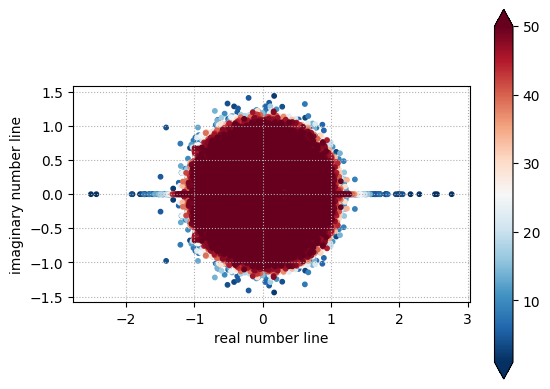

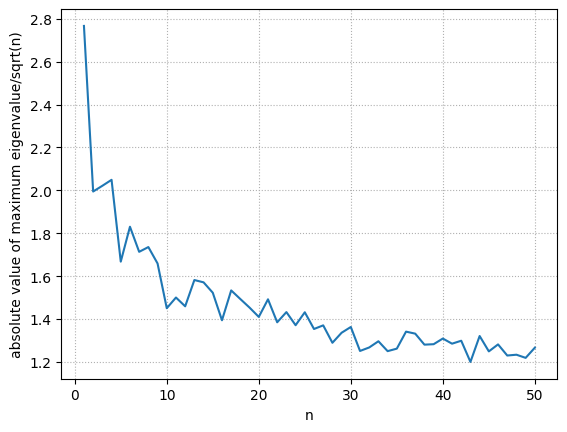

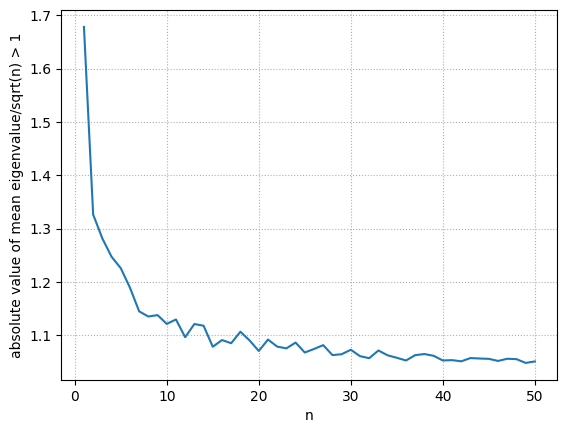

In [20]:
nmax = 50
sample_num = 100

#entries are the eigenvalues of the matrices, divided by sqrt(n)
y = []
#entries are the maximum of abs values of eigenvalues, avegeraged for each n 
y_max = np.zeros(nmax)
#entries are the abs values of eigenvalues > 1, avegeraged for each n
y_gr_one = np.zeros(nmax)
#entries track the size of matrix of corresponding eigenvalue in y
z = []

#starting loop at one to avoid empty matrix eigenvalue
for n in range(1, nmax+1):
    num_gr_one = 0 

    for i in range(sample_num):
        matrix = np.random.normal(size=(n,n))

        eigenvalues = np.linalg.eig(matrix)[0]
        eigen_absolute = np.absolute(eigenvalues)
        eigen_max = eigen_absolute.max()
        eigen_gr_one = eigen_absolute[eigen_absolute/np.sqrt(n) > 1]/np.sqrt(n)

        y.extend((eigenvalues/np.sqrt(n)).tolist())
        z.extend([n]*n)
        
        y_max[n-1] = max(y_max[n-1], eigen_max/np.sqrt(n))

        if len(eigen_gr_one) != 0:
            y_gr_one[n-1] += np.sum(eigen_gr_one)
            num_gr_one += len(eigen_gr_one)

    #taking mean of lambda with abs > 1
    if num_gr_one != 0:
        y_gr_one[n-1] = y_gr_one[n-1]/num_gr_one 


#turning lists into numpy arrays
y = np.array(y)
z = np.array(z)

fig, ax = plt.subplots()

plt.xlabel('real number line')
plt.ylabel('imaginary number line')

pc = ax.scatter(y.real, y.imag, c=z, cmap='RdBu_r', s = 10)
fig.colorbar(pc, extend='both')
ax.grid(True,ls='dotted')
ax.set_aspect('equal')

plt.savefig('scatterplot.png', dpi=1000)

fig2, ax2 = plt.subplots()
x = np.linspace(1, nmax, nmax)
ax2.plot(x, y_max)
ax2.grid(True,ls='dotted')


plt.xlabel('n')
plt.ylabel('absolute value of maximum eigenvalue/sqrt(n)')

plt.savefig('max.png', dpi=1000)


fig3, ax3 = plt.subplots()
x = np.linspace(1, nmax, nmax)
ax3.plot(x, y_gr_one, label = 'eigenvalues')
ax3.grid(True,ls='dotted')


plt.xlabel('n')
plt.ylabel('absolute value of mean eigenvalue/sqrt(n) > 1')
plt.savefig('gr_one.png', dpi=1000)



**(f)**
perché per prima cosa bisogna calcolare il centro di massa di ogni particella?
assi dei momenti sarebbero autovettori giusto...?

In [21]:
from ase import Atoms
from ase.io import write, read

def principal_axis(x,y,z, masses):

    # calculating moment of inertia:
    Ixx = np.sum(masses*(y**2+z**2))
    Iyy = np.sum(masses*(x**2+z**2))
    Izz = np.sum(masses*(x**2+y**2))
    Ixy = - np.sum(masses*x*y)
    Iyz = - np.sum(masses*y*z)
    Ixz = - np.sum(masses*x*z)


    inertia_tensor = np.array([[Ixx, Ixy, Ixz], [Ixy, Iyy, Iyz], [Ixz, Iyz, Izz]])


    eigenvalues, eigenvectors = np.linalg.eig(inertia_tensor)

    return (eigenvalues, eigenvectors)

#change of coordinates to center of mass as origin
def center_of_mass_coordinates(x,y,z,masses):

    #finding ceter of mass
    cmx = np.sum(masses*x)/np.sum(masses)
    cmy = np.sum(masses*y)/np.sum(masses)
    cmz = np.sum(masses*z)/np.sum(masses)

    #calculating new coordinates
    x = x-cmx
    y = y-cmy
    z = z-cmz

    return (x,y,z)
    
#lists cointaing all eigenvalues and eigenvectors
eigenvalues = []
eigenvectors = []

DataSet = read("dataset.xyz",index=':')
for i, molecule in enumerate(DataSet):

    positions = molecule.get_positions()
    masses = molecule.get_masses()

    x = positions[:,0]
    y = positions[:,1]
    z = positions[:,2]

    #shifting origin to center of mass
    x,y,z = center_of_mass_coordinates(x,y,z, masses)

    #calculating eigenvalues of I and eigenvectors (principal axis)
    eigval, eigvect = principal_axis(x,y,z,masses)

    eigenvalues.append(eigval.tolist())
    eigenvectors.append(eigvect.tolist())

#counting symmetric molecules
dim_1 = []
dim_2 = []
symm_axis = []
symm_total = []

tolerance = 1

for i, eigval in enumerate(np.array(eigenvalues)):
    #checking if all elements are distinct
    eigval = np.sort(eigval)

    #if all values are disctinct
    if (not np.isclose(eigval[0], eigval[1], atol=tolerance)) and (not np.isclose(eigval[1], eigval[2], atol=tolerance)) :
        #if one value is zero
        if np.isclose(eigval[0], 0, atol=tolerance):
            dim_2.extend([i])

    #if at least one value is equal
    else:
        #if at least one value is zero
        if np.isclose(eigval[0], 0, atol=tolerance):
            #if two values are zero (and two are equal)
            if np.isclose(eigval[1], 0, atol=tolerance):
                dim_1.extend([i])
            #if one value is zero (and two are equal)
            else:
                dim_2.extend([i])
                symm_axis.extend([i])
        #if no value is zero
        else:
            #if all values are equal (none is zero, no single atoms in the dataset)
            if np.isclose(eigval[0], eigval[1], atol=tolerance) and np.isclose(eigval[1], eigval[2], atol=tolerance):
                symm_total.extend([i])
            #if two values are equal, and none is zero
            else:
                symm_axis.extend([i])

    
    

print("symmetric axis:\n", symm_axis)
print("symmetric total:\n", symm_total)
print("2 dimensional:\n", dim_2)
print("1 dimensional:\n", dim_1)

print(DataSet[194])
print(eigenvalues[194])
print(len(symm_axis))




symmetric axis:
 [1, 3, 7, 10, 13, 16, 23, 26, 29, 53, 56, 117, 128, 133, 142, 163, 166, 242, 335, 351, 371, 561, 660, 737, 948, 1026, 2082, 3187, 3231, 3931, 7150]
symmetric total:
 [0, 194]
2 dimensional:
 [3, 23, 56, 335, 561, 737]
1 dimensional:
 []
Atoms(symbols='C5H12', pbc=False)
[407.018100450719, 407.01874949919716, 407.0191736677633]
31


**Esercizio 2**


**(a)**

In [10]:
A = np.array([[2,-1],[2,2]])
B = np.array([[7,1],[0,0],[5,5]])
U, S, Vh = np.linalg.svd(A)
print("SVD of A\n", U)
print(S)
print(Vh)

U, S, Vh = np.linalg.svd(B)
print("SVD of B\n", U)
print(S)
print(Vh)

SVD of A
 [[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
[3. 2.]
[[-0.89442719 -0.4472136 ]
 [-0.4472136   0.89442719]]
SVD of B
 [[-0.70710678  0.70710678  0.        ]
 [ 0.          0.         -1.        ]
 [-0.70710678 -0.70710678  0.        ]]
[9.48683298 3.16227766]
[[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


**(b)**

In [11]:
A = np.array([[0,1,0,0],[0,0,2,0],[0,0,0,3],[1,0,0,0]])
U, S, Vh = np.linalg.svd(A)
print("SVD of A\n", U)
print(S)
print(Vh)

print(np.array([[1,0,0,0],[0,1,0,0],[0,0,2,0],[0,0,0,3]]) @ np.linalg.inv(A))

SVD of A
 [[ 0.  0. -1.  0.]
 [ 0. -1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0. -1.]]
[3. 2. 1. 1.]
[[-0. -0. -0. -1.]
 [-0. -0. -1. -0.]
 [-0. -1. -0. -0.]
 [-1. -0. -0. -0.]]
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


**(c)**
Le matrici u e vh non variano con epsilon, perché semplicente fanno un riarrengement delle righe. (anche se c'è un meno che non mi convince nell'ultima riga)

In [12]:
eps = 0.00001
A = np.array([[0,1,0,0],[0,0,2,0],[0,0,0,3],[0.1,0,0,0]])
U, S, Vh = np.linalg.svd(A)
print("SVD of A\n", U)
print(S)
print(Vh)

SVD of A
 [[ 0.  0. -1.  0.]
 [ 0. -1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0. -1.]]
[3.  2.  1.  0.1]
[[-0. -0. -0. -1.]
 [-0. -0. -1. -0.]
 [-0. -1. -0. -0.]
 [-1. -0. -0. -0.]]


**(d)**

In [13]:
A = np.array([[1, 2],[3, 4],[1, 1],[1, -1]])
b = np.array([1, 2, 3, 4])

U, s, Vh = np.linalg.svd(A)
U_inv = np.linalg.inv(U)

b_coeff = U_inv @ b

rank = np.sum(s > 1e-10)
U_col =  U[:, :rank]
U_null = U[:, rank:]


b_hat = U_col @ b_coeff[:rank]
z = U_null @ b_coeff[rank:]

print(b)
print(b_hat+z)


[1 2 3 4]
[1. 2. 3. 4.]
